In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_with_infertility_path = "./data/PCOS_infertility.csv"
data_without_infertility_path = "./data/PCOS_data_without_infertility.xlsx"
df_infertility = pd.read_csv(data_with_infertility_path)
df_fertility = pd.read_excel(data_without_infertility_path, sheet_name="Full_new")

#### We have been provided two datasets. If the 2nd dataset has more information, we need to include that as well. Compare the values of each columns for 2 available datasets i.e., with infertility and without infertility
#### If they are equal then just consider the data with fertility because the this data contains the data from infertility as well as extra data


In [278]:
pcos = df_fertility["PCOS (Y/N)"].equals(df_infertility["PCOS (Y/N)"])
I_beta_hcg = df_fertility["  I   beta-HCG(mIU/mL)"].equals(df_infertility["  I   beta-HCG(mIU/mL)"])
II_beta_hcg = df_fertility["II    beta-HCG(mIU/mL)"] .equals(df_infertility["II    beta-HCG(mIU/mL)"])

# Converting AMH column of fertility data to match the datatype for equals comparison
df_fertility["AMH(ng/mL)"] = df_fertility["AMH(ng/mL)"].astype("str", copy=False)
amh = df_fertility["AMH(ng/mL)"].equals(df_infertility["AMH(ng/mL)"])

comparison_features = {"pcos":pcos, 
                        "I_beta_hcg": I_beta_hcg, 
                        "II_beta_hcg": II_beta_hcg, 
                        "amh": amh
                        }

conflicts_in = [k for k, v in comparison_features.items() if not v]
if len(conflicts_in):
    print(f"The columns where values do not match are: {conflicts_in}")
else:
    df = df_fertility
    print("All the data in all given columns are same")



The columns where values do not match are: ['II_beta_hcg']


#### Checking which rows of the mentioned columns have different data and what are they

In [279]:
def find_differences(fertility_col, infertility_col):
    info = list()
    # info.append(["row", "fertility data value", "infertility data value"])
    for i, v in enumerate(infertility_col):
        if fertility_col[i] != v:
            info.append([i, fertility_col[i], v])
    return info, fertility_col.name


II_beta_hcg_info, II_beta_hcg_col_name = find_differences(df_fertility["II    beta-HCG(mIU/mL)"], df_infertility["II    beta-HCG(mIU/mL)"])
for i in II_beta_hcg_info:
    print(f'For column {II_beta_hcg_col_name}, row {i[0]}, the fertility dataset value {i[1]} differs from the infertility dataset value {i[2]}')


For column II    beta-HCG(mIU/mL), row 123, the fertility dataset value 1.99. differs from the infertility dataset value 0.110416667


#### Replacing the value by averaging the column values of "II beta-HCG(mIU/mL)" where pcos is 1

In [290]:
df_fertility.at[123, "II    beta-HCG(mIU/mL)"] = np.NaN
# df["II    beta-HCG(mIU/mL)"] = df["II    beta-HCG(mIU/mL)"].interpolate(method='linear', axis=0).ffill().bfill()
req_vals_for_hcg_ii = [df_fertility.at[x, "II    beta-HCG(mIU/mL)"] for x in range(len(df_fertility["II    beta-HCG(mIU/mL)"])) if df_fertility.at[x, "PCOS (Y/N)"] == df_fertility.at[123, "PCOS (Y/N)"]]
df_fertility.at[123, "II    beta-HCG(mIU/mL)"] = np.nanmean(req_vals_for_hcg_ii)
df.iloc[120:130]

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
120,121,121,0,30,63.0,159.0,24.919900,15,76,20,10.5,4,9,5.0,0,0,1.99,479.660000,7.78,14.69,0.529612,40,33,0.825000,2.90,3.3,24.15,56.30,0.44,100.0,0,0,0,0,0,1.0,1,110,70,3,2,16.0,14.0,8.6
121,122,122,0,33,48.0,148.0,21.913806,16,70,18,10.0,2,5,12.0,0,0,357.09,1.900000,7.60,0.48,15.833333,38,30,0.789474,1.67,3.9,27.45,33.40,6.39,100.0,0,1,0,0,0,0.0,0,110,80,1,1,15.0,18.0,6.2
122,123,123,1,22,79.0,155.0,32.882414,11,72,18,11.3,2,5,4.0,0,0,138.68,586.060000,4.14,4.06,1.019704,45,37,0.822222,2.90,17.9,21.92,22.92,0.42,92.0,1,0,1,0,1,1.0,1,110,80,6,10,16.0,15.0,13.4
123,124,124,1,23,40.0,150.0,17.777778,15,74,18,10.8,2,5,2.0,0,0,1.99,269.063119,5.00,5.15,0.970874,46,38,0.826087,1.69,19.8,15.23,23.50,0.93,92.0,1,1,1,1,0,1.0,1,100,70,10,13,18.0,17.0,12.5
124,125,125,1,26,78.0,159.0,30.853210,13,78,20,11.0,2,5,4.0,0,0,1.99,1.990000,4.88,5.84,0.835616,45,39,0.866667,2.31,9.2,31.53,56.20,0.40,100.0,1,0,1,1,1,1.0,1,120,80,8,10,16.0,18.0,8.5
125,126,126,0,38,54.0,155.0,22.476587,13,72,22,10.8,2,5,4.0,0,1,363.13,2.800000,8.36,0.78,10.717949,41,33,0.804878,2.43,2.4,33.51,13.50,0.50,92.0,1,0,0,0,0,0.0,0,120,80,7,6,18.0,17.0,12.0
126,127,127,0,40,56.0,154.0,23.612751,15,72,18,10.2,2,5,14.0,0,0,84.79,1.990000,5.01,1.94,2.582474,42,33,0.785714,2.08,4.5,26.34,52.20,0.91,98.0,0,0,0,1,0,0.0,1,110,80,2,3,18.0,18.0,8.5
127,128,128,0,42,48.0,148.0,21.913806,11,72,18,11.2,2,5,8.0,0,0,1.99,15.360000,6.81,3.83,1.778068,40,32,0.800000,1.99,5.14,18.02,9.20,0.32,100.0,0,0,0,0,0,0.0,0,110,70,1,0,17.0,15.0,9.0
128,129,129,0,41,54.0,150.0,24.000000,15,70,18,11.5,2,5,10.0,0,0,98.91,54.080000,7.37,1.51,4.880795,38,30,0.789474,15.68,2.4,20.16,25.60,0.28,92.0,0,0,0,0,0,0.0,1,110,80,0,1,15.0,9.0,14.0
129,130,130,0,40,40.0,145.0,19.024970,11,72,18,10.2,2,5,4.0,0,4,1.99,1.990000,4.96,0.69,7.188406,38,31,0.815789,1.86,0.3,45.56,36.10,0.35,92.0,0,1,0,0,0,0.0,0,110,80,2,1,19.0,12.0,9.7


#### Now we can set our default data frame as df_fertility

In [281]:
df = df_fertility
# Drop column "Unnamed: 44"
df = df.drop(columns=["Unnamed: 44"])
pd.set_option('display.max_columns', None)

#### Checking for null, nan and blank values

In [285]:
null_vals = np.where(pd.isna(df))
na_vals = df[df.isna().any(axis=1)]

cols_with_nan = [df.columns[x] for x in list(null_vals[1])]

na_vals


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)


In [284]:
print(null_vals)

(array([156, 458]), array([35, 13]))


#### Now that we know that 'Fast food (Y/N)' and 'Marraige Status (Yrs)' column has the nan values, we work on eliminating or replacing it.

In [283]:
df["Fast food (Y/N)"] = df["Fast food (Y/N)"].fillna(df["Fast food (Y/N)"].mean())
# df["Marraige Status (Yrs)"] = df["Marraige Status (Yrs)"].fillna(df["Marraige Status (Yrs)"].mean())
# df["Fast food (Y/N)"] = df["Fast food (Y/N)"].interpolate(method='linear', axis=0).ffill().bfill()
df["Marraige Status (Yrs)"] = df["Marraige Status (Yrs)"].interpolate(method='linear', axis=0).ffill().bfill()
na_vals1 = df[df.isna().any(axis=1)]
col1_idx = df.columns.get_loc("Marraige Status (Yrs)")
col2_idx = df.columns.get_loc("Fast food (Y/N)")
print(col1_idx, col2_idx)
# See the new values for Nan
print(df.iloc[458, 13])
print(df.iloc[156, 35])

13 35
5.5
0.5148148148148148


### Rechecking if there is any null values, we can see that there are no null values. Dataset is ready for cross validation.

In [292]:
na_vals = df[df.isna().any(axis=1)]
na_vals

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)


In [294]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0


### Now for the feature selection, we will create a heatmap for the features available. We will select top X percentage of feature to work with. The feature selection will be done with accordance to the relation of the features with out target variable. Therefore, we will only be selecting the features with high correlation to our target feature


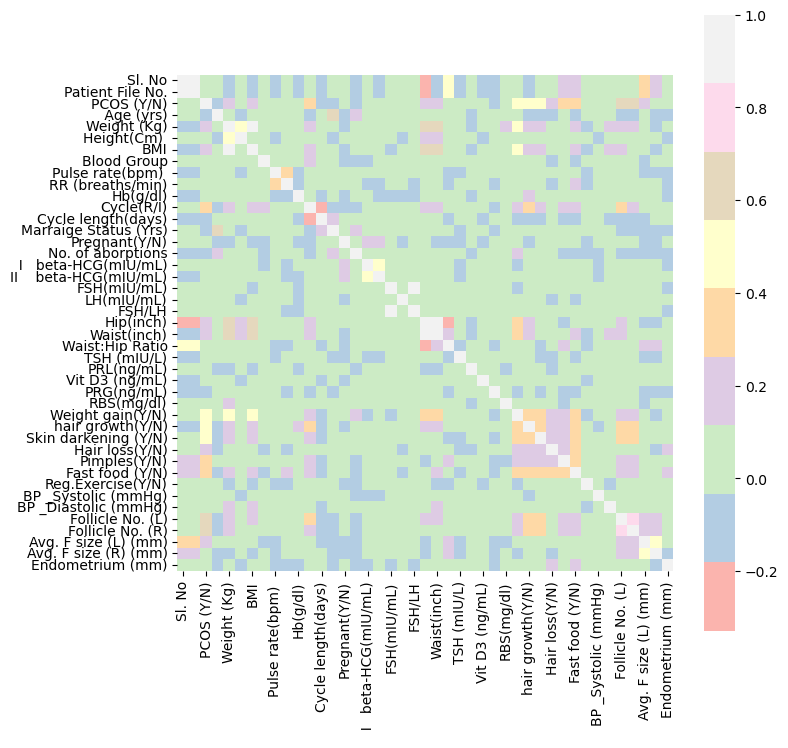

In [307]:
### Corelation matrix
mat_corr = df.corr()
plt.subplots(figsize=(8, 8))
sns.heatmap(mat_corr, cmap="Pastel1", square=True);

### List out all the strongly correlated features with PCOS(Y/N) in ascending order

In [321]:
all_features = mat_corr["PCOS (Y/N)"].sort_values(ascending=False)
selection_criteria = round(len(all_features) * (30/100))
robust_features = all_features[:int(selection_criteria)]
print(len(robust_features))
robust_features

13


PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.377763
Pimples(Y/N)            0.286077
Weight (Kg)             0.211938
BMI                     0.199534
Hair loss(Y/N)          0.172879
Waist(inch)             0.164598
Name: PCOS (Y/N), dtype: float64

### Performing 10-fold cross validation in our dataframe.
### But for initial phase, we will go with simple test_train split.
### Later on we can compare the accuracy with 10-fold cross validation